Máquinas seleccionadas para operar:
M1
M2
M3

Producción total máxima: 65.0


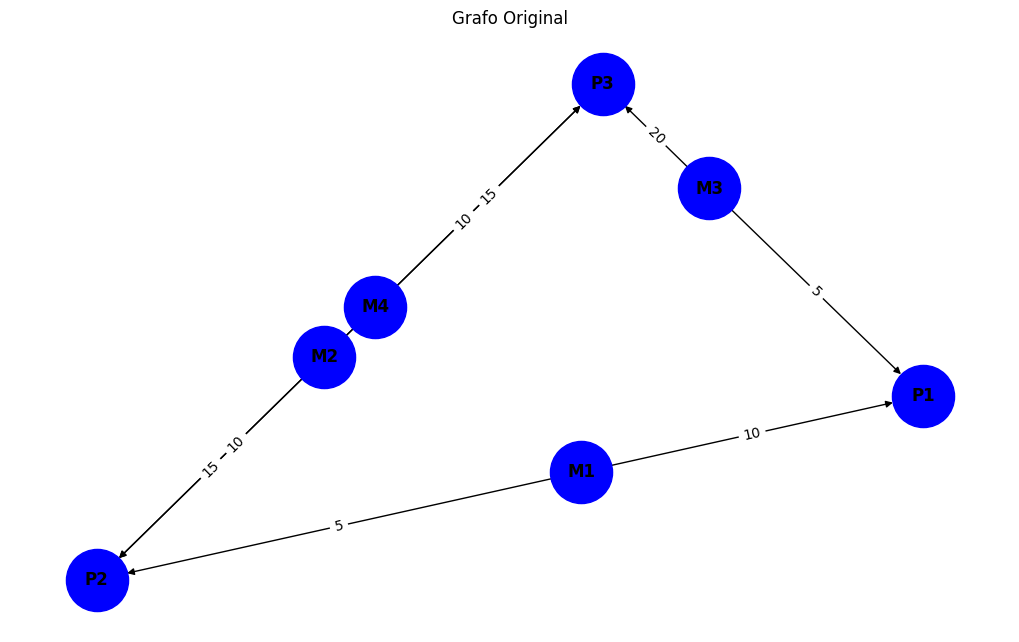

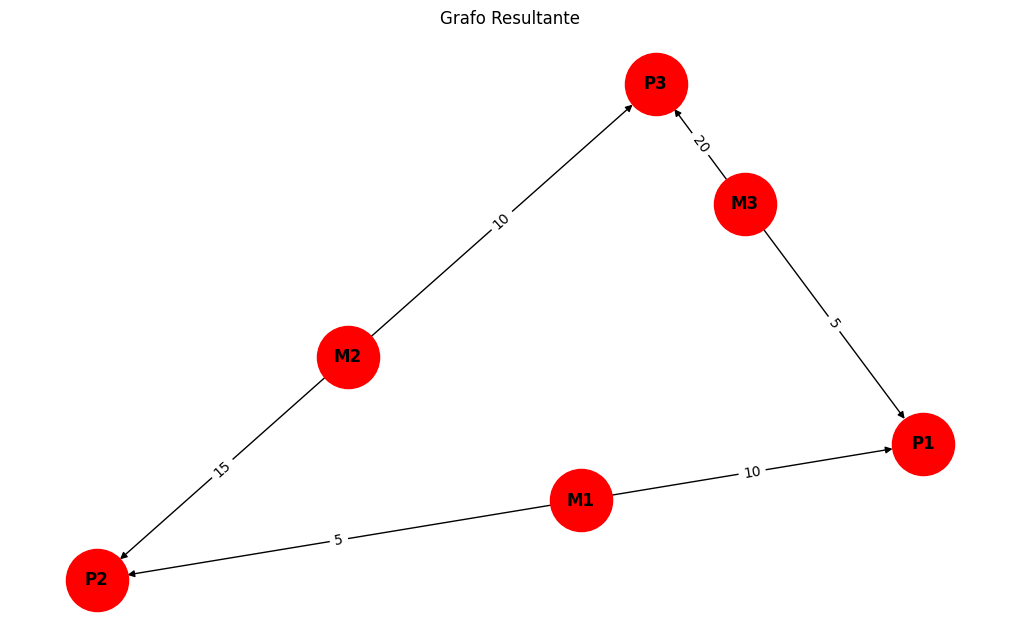

In [9]:
!pip install pulp

import pulp
import networkx as nx
import matplotlib.pyplot as plt

#Usé la optimización combinatoria ya que este problema busca maximizar una
#función objetivo (producción total) bajo una restricción de presupuesto
#y usé pulp como optimización.

maquinas = ['M1', 'M2', 'M3', 'M4']
productos = ['P1', 'P2', 'P3']
costos = {'M1': 5, 'M2': 8, 'M3': 6, 'M4': 7}
produccion_matriz = {
    'M1': [10, 5, 0],
    'M2': [0, 15, 10],
    'M3': [5, 0, 20],
    'M4': [0, 10, 15]
}
presupuesto = 20

uso_maquina = pulp.LpVariable.dicts("Uso", maquinas, cat="Binary")

model = pulp.LpProblem("Asignación_Máquinas", pulp.LpMaximize)

model += pulp.lpSum(
    uso_maquina[m] * sum(produccion_matriz[m]) for m in maquinas
), "ProduccionTotal"

model += pulp.lpSum(
    uso_maquina[m] * costos[m] for m in maquinas
) <= presupuesto, "Presupuesto"

model.solve()

print("Máquinas seleccionadas para operar:")
for m in maquinas:
    if pulp.value(uso_maquina[m]) == 1:
        print(f"{m}")

print(f"\nProducción total máxima: {pulp.value(model.objective)}")

G = nx.DiGraph()
for mi, maquina in enumerate(maquinas):
    for pj, producto in enumerate(productos):
        prod = produccion_matriz[maquina][pj]
        if prod > 0:
            G.add_edge(maquina, producto, weight=prod)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="blue", font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d}" for (u, v), d in edge_labels.items()})
plt.title("Grafo Original")
plt.show()

G_opt = nx.DiGraph()
for mi, maquina in enumerate(maquinas):
    if pulp.value(uso_maquina[maquina]) == 1:
        for pj, producto in enumerate(productos):
            prod = produccion_matriz[maquina][pj]
            if prod > 0:
                G_opt.add_edge(maquina, producto, weight=prod)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_opt, seed=42)
nx.draw(G_opt, pos, with_labels=True, node_size=2000, node_color="red", font_weight="bold")
edge_labels = nx.get_edge_attributes(G_opt, 'weight')
nx.draw_networkx_edge_labels(G_opt, pos, edge_labels={(u, v): f"{d}" for (u, v), d in edge_labels.items()})
plt.title("Grafo Resultante")
plt.show()